##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

Cloning into 'TestImages'...
remote: Enumerating objects: 104, done.
remote: Total 104 (delta 0), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (104/104), 19.32 MiB | 33.70 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content
sample_data  TestImages


*Entrar na pasta da imagem de teste utilizada*

In [ ]:
%cd /content/TestImages/Morphology/
!ls

/content/TestImages/Morphology
Pontilhismo2.png  Pontilhismo.png


# **Questão:**

\

O filtro morfolóógico top-hat negro é dado pela seguinte expressão:

\

$ T_b (f) = f \;\; \mathbf{fec}\; \; B \;-\; f $

\

Esta operação retorna uma imagem contendo os objetos contíguos que:

 *   São menores que o elemento estrurturante $B$, e
 *   que também são mais escuros que seu entorno.

\

A imagem de teste Pontilhismo2.png contém círculos de cor preta em de três tamnnhos distintos: 20 x 20; 60 x 60 e 100 x 100.

Complete o código a seguir e analise os resultados obtidos:

1. nas linhas 9-11 inclua o código do filtro black top hat

2. modifique o código da linha 36 para produzir a segmentação somente dos círculos de diâmetro 60 x 60 (você pode usar o operador ou-exclusivo ^ para isso).

3. na linha 42, modifique o código para produzir a segmentação somente dos círculos de diâmetro 100 x 100 (você pode usar o operador ou-exclusivo ^ para isso).

Utilize a célula após o código para explicar sua solução. Inclua também uma análise da pós-segmentação apresentada nas linhas 13 e 14 do código original.



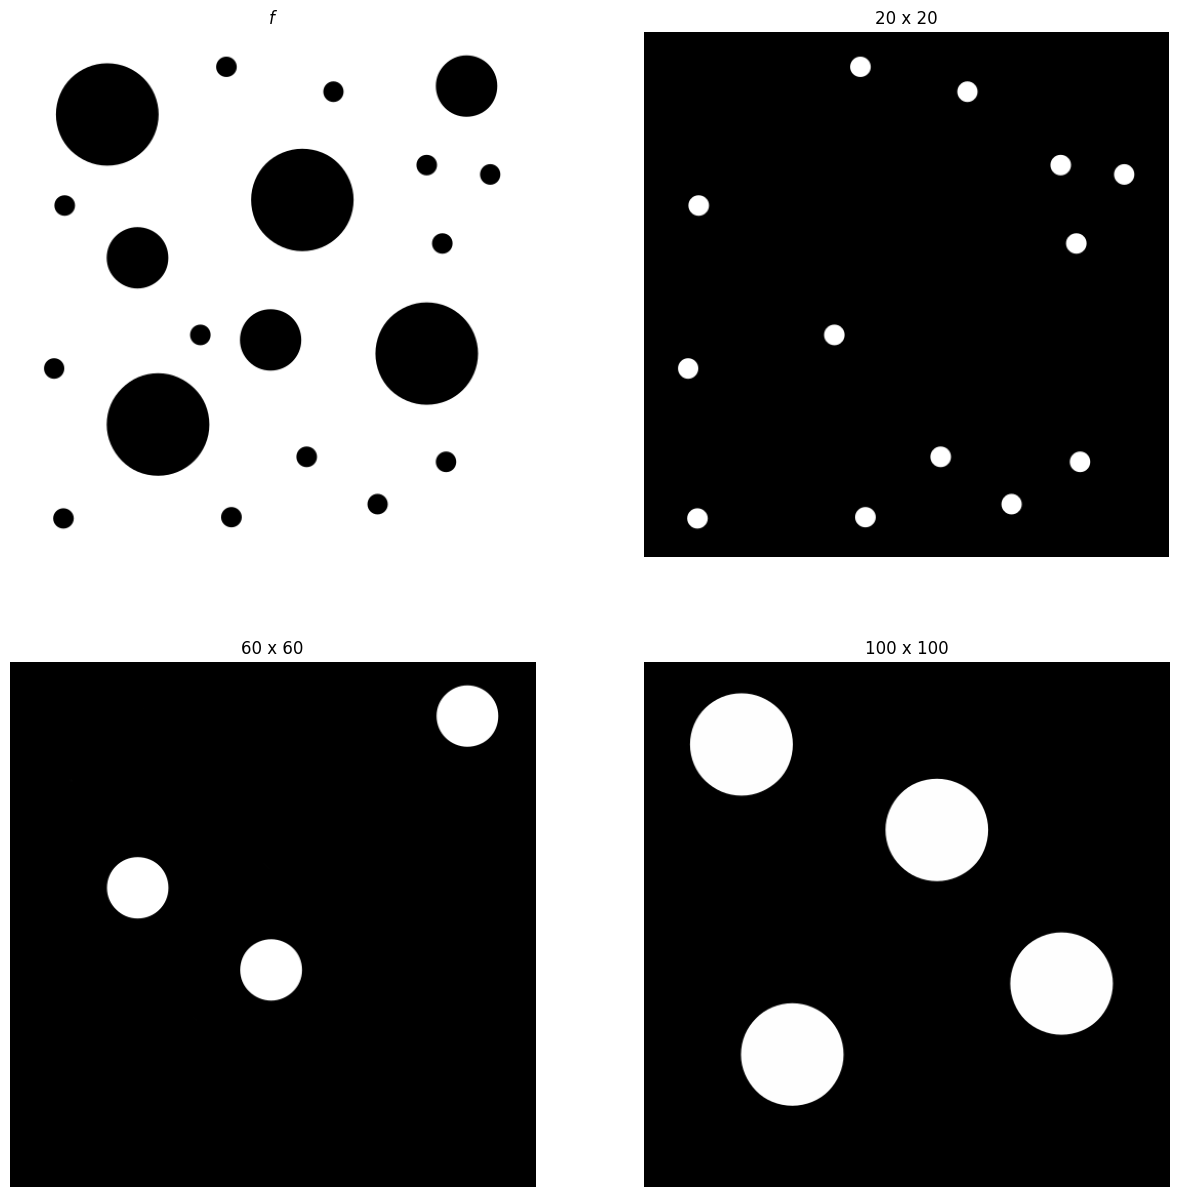

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def BlackTopHat_HoleDetection( f, B_Size ):
  B = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, B_Size)
  # implemente nas linhas 9, 10 e 11 o filtro black top hat (item 1).
  T = cv2.dilate(f,B,iterations = 1)
  T = cv2.erode(T, B, iterations = 1)
  T = T-f

  # no código a seguir a operação de abertura é usada para eliminar elementos pequenos persistentes oriundos das bordas dos círculos
  Baux = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  Topen = cv2.dilate(cv2.erode(T,Baux,iterations = 1), Baux, iterations = 1)
  return Topen

f = cv2.imread('Pontilhismo2.png',0)

#execução do BlacTopkHat armazenando as imagens para executar o operador ^ (ou-exclusivo)
img20 = BlackTopHat_HoleDetection( f, (25,25))
img60 = (BlackTopHat_HoleDetection( f, (65,65)))
img100 = (BlackTopHat_HoleDetection( f, (105,105)))

plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.title('$f$')
plt.axis('off')
plt.imshow(f, cmap = 'gray')

plt.subplot(2,2,2)
plt.title('20 x 20')
plt.axis('off')
plt.imshow(img20, cmap = 'gray')

plt.subplot(2,2,3)
plt.title('60 x 60')
plt.axis('off')
#modifique a linha a seguir para apresentar somente os círculos de 60 x 60
plt.imshow(img20^img60 , cmap = 'gray')

plt.subplot(2,2,4)
plt.title('100 x 100')
plt.axis('off')
#modifique a linha a seguir para apresentar somente os círculos de 100 x 100
plt.imshow(img60 ^img100, cmap = 'gray')

## Segmentação
  * A solução empregada foi a implementação de $ f \;\; \mathbf{fec}\; \; B \;-\; f $ com a seguinte ordem de prescedência:

      1. Realização da **Dilatação** de f com o kernel B
      2. Realização da **Erosão** do resultado do tópico 1 com o kernel B
      3. Efetuar a subtração do resultado do item 2 - a imagem após o fechamento -, com a imagem original.

  * Dessa forma, foram preservados os elementos menores que o tamanho do kernel e as demais áreas foram escurecidas. A operação de fechamento excluiu os itens que queríamos obter - aqueles menores que o kernel -, e, por isso, a subtração com a imagem original, a fim de obter os itens desejados.
  * Como as imagens com kernel 60x60 e 100x100 retornariam não só os itens com esse tamanho, mas também as de tamanho menor, foi utilizado o operador ^ (ou exclusivo) com a imagem gerada anteriormente. Dessa forma, apenas os elementos que não haviam sido obtidos anteriormente estariam presentes na imagem, como foi possível constatar.

## Pós-segmentação
  * No trecho de código:
  ~~~~
  Baux = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  Topen = cv2.dilate(cv2.erode(T,Baux,iterations = 1), Baux, iterations = 1)
  ~~~~

  Foi realizada a operação de **Abertura**, a fim de remover possíveis ruídos resultantes da operação de fechamento, isto é, possíveis traços dos objetos que não estaríam mais presentes.
    1. Primeiro foi realizada uma erosão - a qual removeria os ruídos
    2. Em seguida, foi realizada uma dilatação na imagem resultante, para corrigir os efeitos da erosão nos elementos restantes.

## Observação:
 * Como os elementos que buscamos são circulos, a forma definida para o elemento estruturante foi a elíptica.